In [1]:

# Biblioteca para tratamiento de datos
import pandas as pd
import numpy as np

# Imputación de nulos usando métodos avanzados estadísticos
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from scipy.stats import shapiro
from scipy.stats import kruskal
import scikit_posthocs as sp
from scipy.stats import f_oneway
# Librerías de visualización
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
import warnings
warnings.filterwarnings("ignore")

# Configuración para poder visualizar todas las columnas y filas de los DataFrames
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## **Fase 1**: Exploración y Limpieza

In [2]:
# Función para leer csv
def ejecutar_csv(ruta_csv):
    df= pd.read_csv(ruta_csv)
   
    return df

In [3]:
# LLamo la función para leer csv e imprimir las 5 primeras filas 
df_flight = ejecutar_csv('Customer_Flight_Activity.csv')
df_flight.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [4]:
df_loyalty = ejecutar_csv('Customer_Loyalty_History.csv')
df_loyalty.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [5]:
# Imprimo la forma de mi df Flight, se observa el número de filas y columnas 
df_flight.shape

(405624, 10)

In [6]:
# Imprimo la forma de mi df Loyalty, se observa el número de filas y columnas 
df_loyalty.shape

(16737, 16)

In [7]:
# Función para uniformizar los nombres de las columnas
def renombrar_columnas_con_guion_bajo(df):
    df.columns = [col.replace(" ", "_") for col in df.columns]
    return df

In [8]:
# Llamo la función para uniformizar los nombres de las columnas y combruebo que funciona 
df_loyalty_1 = renombrar_columnas_con_guion_bajo(df_loyalty)
df_loyalty_1.head()

,Loyalty_Number,Country,Province,City,Postal_Code,Gender,Education,Salary,Marital_Status,Loyalty_Card,CLV,Enrollment_Type,Enrollment_Year,Enrollment_Month,Cancellation_Year,Cancellation_Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [9]:
# Llamo la función para uniformizar los nombres de las columnas y combruebo que funciona 
df_flight_1 = renombrar_columnas_con_guion_bajo(df_flight)
df_flight_1.head()

,Loyalty_Number,Year,Month,Flights_Booked,Flights_with_Companions,Total_Flights,Distance,Points_Accumulated,Points_Redeemed,Dollar_Cost_Points_Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [10]:
df_flight_1.duplicated().sum()

1864

In [11]:
df_loyalty_1.duplicated().sum()

0

In [12]:
# Creo una nueva variable para la unión. 
# Utilico el merge ya que los dos archivos tienen columnas en común y para preservar todos los datos ya que los dfs tiene cantidad de datos distintos, 
# Unifico los dos DataFrames poniendo Loyalty como el primero a la izquierda y Flight como el segundo a la derecha
# Utilico la columna `Loyalty_Number`, que es la columnas que los dos DFs tienen en común para unificar.
df_customers = df_loyalty_1.merge(df_flight_1, left_on='Loyalty_Number', right_on='Loyalty_Number', how='left')

df_customers.head()

,Loyalty_Number,Country,Province,City,Postal_Code,Gender,Education,Salary,Marital_Status,Loyalty_Card,CLV,Enrollment_Type,Enrollment_Year,Enrollment_Month,Cancellation_Year,Cancellation_Month,Year,Month,Flights_Booked,Flights_with_Companions,Total_Flights,Distance,Points_Accumulated,Points_Redeemed,Dollar_Cost_Points_Redeemed
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,1,0,0,0,0,0.0,0,0
1,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,2,3,0,3,2823,282.0,0,0
2,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,3,0,0,0,0,0.0,0,0
3,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,4,0,0,0,0,0.0,0,0
4,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2018,10,6,2,8,3352,335.0,465,38


In [13]:
# Miro la forma del DF unificado 
df_customers.shape

(405624, 25)

In [14]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty_Number               405624 non-null  int64  
 1   Country                      405624 non-null  object 
 2   Province                     405624 non-null  object 
 3   City                         405624 non-null  object 
 4   Postal_Code                  405624 non-null  object 
 5   Gender                       405624 non-null  object 
 6   Education                    405624 non-null  object 
 7   Salary                       302952 non-null  float64
 8   Marital_Status               405624 non-null  object 
 9   Loyalty_Card                 405624 non-null  object 
 10  CLV                          405624 non-null  float64
 11  Enrollment_Type              405624 non-null  object 
 12  Enrollment_Year              405624 non-null  int64  
 13 

In [15]:
# Visualizo si el DF tiene duplicados 
df_customers.duplicated().sum()

1864

In [16]:
# Elimino las filas duplicadas del df 
df_sin_duplicados = df_customers.drop_duplicates()
# Compruebo que no hay duplicados en el df
df_sin_duplicados.duplicated().sum()

0

In [17]:
# Imprimo la forma del df después de quitar las filas duplicadas
df_sin_duplicados.shape

(403760, 25)

In [18]:
# Imprimo el DF con 5 columnas aleatórias
df_sin_duplicados.sample(5)

,Loyalty_Number,Country,Province,City,Postal_Code,Gender,Education,Salary,Marital_Status,Loyalty_Card,CLV,Enrollment_Type,Enrollment_Year,Enrollment_Month,Cancellation_Year,Cancellation_Month,Year,Month,Flights_Booked,Flights_with_Companions,Total_Flights,Distance,Points_Accumulated,Points_Redeemed,Dollar_Cost_Points_Redeemed
273372,556958,Canada,Ontario,Toronto,M2P 4F6,Female,College,NaN,Single,Star,2596.19,Standard,2014,8,NaN,NaN,2018,2,11,1,12,1824,196.56,0,0
181642,190256,Canada,British Columbia,Victoria,V10 6T5,Female,Bachelor,70676.0,Divorced,Nova,7053.30,Standard,2012,6,NaN,NaN,2017,9,11,6,17,4046,404.00,0,0
338171,893771,Canada,Ontario,Sudbury,M5V 1G5,Female,Bachelor,74235.0,Single,Star,5765.50,Standard,2015,7,NaN,NaN,2018,1,3,0,3,234,23.00,0,0
402432,902200,Canada,Ontario,Ottawa,K1F 2R2,Male,Bachelor,81820.0,Married,Star,28119.29,Standard,2013,8,2016.0,4.0,2017,1,0,0,0,0,0.00,0,0
65309,402251,Canada,Ontario,Toronto,P1J 8T7,Female,Bachelor,103151.0,Single,Aurora,8622.84,Standard,2017,10,NaN,NaN,2017,6,0,0,0,0,0.00,0,0


In [19]:
# Miro como están distribuidas las columnas por tipo
df_sin_duplicados.dtypes

Loyalty_Number                   int64
Country                         object
Province                        object
City                            object
Postal_Code                     object
Gender                          object
Education                       object
Salary                         float64
Marital_Status                  object
Loyalty_Card                    object
CLV                            float64
Enrollment_Type                 object
Enrollment_Year                  int64
Enrollment_Month                 int64
Cancellation_Year              float64
Cancellation_Month             float64
Year                             int64
Month                            int64
Flights_Booked                   int64
Flights_with_Companions          int64
Total_Flights                    int64
Distance                         int64
Points_Accumulated             float64
Points_Redeemed                  int64
Dollar_Cost_Points_Redeemed      int64
dtype: object

In [20]:
# Calculo la media, la mediana y la moda de la Columna 'Salary' para saber que es mejor imputar
media_salary = df_sin_duplicados['Salary'].mean()
mediana_salary = df_sin_duplicados['Salary'].median()
moda_salary = df_sin_duplicados['Salary'].mode()[0]

print(f'La media de la columna Salary es: {np.round(media_salary, 2)}') 
print(f'La mediana de la columna Salary es: {mediana_salary}')
print(f'La moda de la columna Salary es: {np.round(moda_salary, 2)}')

La media de la columna Salary es: 79258.58
La mediana de la columna Salary es: 73479.0
La moda de la columna Salary es: 101933.0


In [21]:
# Imprimo la cantidad de nullos de mi df 
df_sin_duplicados.isnull().sum()


Loyalty_Number                      0
Country                             0
Province                            0
City                                0
Postal_Code                         0
Gender                              0
Education                           0
Salary                         102260
Marital_Status                      0
Loyalty_Card                        0
CLV                                 0
Enrollment_Type                     0
Enrollment_Year                     0
Enrollment_Month                    0
Cancellation_Year              354110
Cancellation_Month             354110
Year                                0
Month                               0
Flights_Booked                      0
Flights_with_Companions             0
Total_Flights                       0
Distance                            0
Points_Accumulated                  0
Points_Redeemed                     0
Dollar_Cost_Points_Redeemed         0
dtype: int64

In [22]:
  
porcentaje_nulos = (df_sin_duplicados.isnull().sum() / df_sin_duplicados.shape[0]) * 100
porcentaje_nulos



Loyalty_Number                  0.000000
Country                         0.000000
Province                        0.000000
City                            0.000000
Postal_Code                     0.000000
Gender                          0.000000
Education                       0.000000
Salary                         25.326927
Marital_Status                  0.000000
Loyalty_Card                    0.000000
CLV                             0.000000
Enrollment_Type                 0.000000
Enrollment_Year                 0.000000
Enrollment_Month                0.000000
Cancellation_Year              87.703091
Cancellation_Month             87.703091
Year                            0.000000
Month                           0.000000
Flights_Booked                  0.000000
Flights_with_Companions         0.000000
Total_Flights                   0.000000
Distance                        0.000000
Points_Accumulated              0.000000
Points_Redeemed                 0.000000
Dollar_Cost_Poin

In [23]:
# Utilizo la funcion ".abs" para que convierta los valores numéricos negativos de la columna en valores absolutos.
df_sin_duplicados.loc[:, 'Salary'] = df_sin_duplicados['Salary'].abs()

In [24]:
df_sin_duplicados.head()

,Loyalty_Number,Country,Province,City,Postal_Code,Gender,Education,Salary,Marital_Status,Loyalty_Card,CLV,Enrollment_Type,Enrollment_Year,Enrollment_Month,Cancellation_Year,Cancellation_Month,Year,Month,Flights_Booked,Flights_with_Companions,Total_Flights,Distance,Points_Accumulated,Points_Redeemed,Dollar_Cost_Points_Redeemed
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,1,0,0,0,0,0.0,0,0
1,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,2,3,0,3,2823,282.0,0,0
2,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,3,0,0,0,0,0.0,0,0
3,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,4,0,0,0,0,0.0,0,0
4,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2018,10,6,2,8,3352,335.0,465,38


In [25]:
# Imputo la mediana en la columna 'Salary'
media_salary = df_sin_duplicados['Salary'].median()
df_sin_duplicados.loc[:, "Salary"] = df_sin_duplicados["Salary"].fillna(media_salary)
print(f'La mediana de la columna Salary es: {mediana_salary}')

La mediana de la columna Salary es: 73479.0


In [26]:
# Compruebo si hay algun valor nulo en el DF.
df_sin_duplicados.isnull().sum()

Loyalty_Number                      0
Country                             0
Province                            0
City                                0
Postal_Code                         0
Gender                              0
Education                           0
Salary                              0
Marital_Status                      0
Loyalty_Card                        0
CLV                                 0
Enrollment_Type                     0
Enrollment_Year                     0
Enrollment_Month                    0
Cancellation_Year              354110
Cancellation_Month             354110
Year                                0
Month                               0
Flights_Booked                      0
Flights_with_Companions             0
Total_Flights                       0
Distance                            0
Points_Accumulated                  0
Points_Redeemed                     0
Dollar_Cost_Points_Redeemed         0
dtype: int64

In [27]:
# Hago una copia del df para seguir trabajando 
df_limpio = df_sin_duplicados.copy()
df_limpio.sample(5)

,Loyalty_Number,Country,Province,City,Postal_Code,Gender,Education,Salary,Marital_Status,Loyalty_Card,CLV,Enrollment_Type,Enrollment_Year,Enrollment_Month,Cancellation_Year,Cancellation_Month,Year,Month,Flights_Booked,Flights_with_Companions,Total_Flights,Distance,Points_Accumulated,Points_Redeemed,Dollar_Cost_Points_Redeemed
209413,828895,Canada,Ontario,Toronto,M2Z 4K1,Female,College,73479.0,Married,Nova,9657.58,Standard,2012,7,NaN,NaN,2018,4,7,1,8,752,93.75,0,0
331048,734952,Canada,Ontario,Sudbury,M5V 1G5,Female,Bachelor,100613.0,Married,Star,5386.97,Standard,2017,11,NaN,NaN,2018,5,15,0,15,1860,186.00,0,0
110599,757420,Canada,Saskatchewan,Regina,S1J 3C5,Female,Bachelor,49390.0,Married,Nova,2902.62,Standard,2014,10,NaN,NaN,2017,9,0,0,0,0,0.00,0,0
150531,407238,Canada,Ontario,Kingston,M9K 2P4,Male,College,73479.0,Single,Nova,4874.07,Standard,2014,4,NaN,NaN,2017,5,9,3,12,4248,424.00,0,0
115752,661546,Canada,Nova Scotia,Halifax,B3J 9S2,Male,Bachelor,47240.0,Married,Nova,3094.32,Standard,2018,11,NaN,NaN,2017,1,0,0,0,0,0.00,0,0


In [28]:
# Elimino columnas innecesarias con la función .drop --> Country porque son todos de Canada <--
columnas_a_eliminar= ['Country', 'Cancellation_Year','Cancellation_Month' ]
df_limpio.drop(columns=columnas_a_eliminar, axis = 1, inplace=True)
print(f"Las columnas {columnas_a_eliminar} han sido eliminadas")

Las columnas ['Country', 'Cancellation_Year', 'Cancellation_Month'] han sido eliminadas


In [29]:
# Imprimo las columnas numéricas 
columnas_numericas = df_limpio.select_dtypes(include=['number']).columns

print("Las columnas numéricas son:", columnas_numericas)

Las columnas numéricas son: Index(['Loyalty_Number', 'Salary', 'CLV', 'Enrollment_Year',
       'Enrollment_Month', 'Year', 'Month', 'Flights_Booked',
       'Flights_with_Companions', 'Total_Flights', 'Distance',
       'Points_Accumulated', 'Points_Redeemed', 'Dollar_Cost_Points_Redeemed'],
      dtype='object')


In [30]:
# Imprimo las columnas categóricas 
columnas_categoricas = df_limpio.select_dtypes(include=['object', 'category']).columns
print("Las columnas categóricas son:", columnas_categoricas)

Las columnas categóricas son: Index(['Province', 'City', 'Postal_Code', 'Gender', 'Education',
       'Marital_Status', 'Loyalty_Card', 'Enrollment_Type'],
      dtype='object')


In [31]:
df_limpio.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty_Number,403760.0,549875.383713,258961.514684,100018.00,326699.00,550598.00,772152.00,999986.00
Salary,403760.0,77879.284748,30117.567539,9081.00,63901.00,73479.00,82940.00,407228.00
CLV,403760.0,7990.864857,6863.317160,1898.01,3981.78,5776.34,8937.12,83325.38
Enrollment_Year,403760.0,2015.250716,1.979427,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment_Month,403760.0,6.667555,3.398829,1.00,4.00,7.00,10.00,12.00
Year,403760.0,2017.500352,0.500000,2017.00,2017.00,2018.00,2018.00,2018.00
Month,403760.0,6.501335,3.451982,1.00,4.00,7.00,10.00,12.00
Flights_Booked,403760.0,4.134050,5.230064,0.00,0.00,1.00,8.00,21.00
Flights_with_Companions,403760.0,1.036569,2.080472,0.00,0.00,0.00,1.00,11.00
Total_Flights,403760.0,5.170619,6.526858,0.00,0.00,1.00,10.00,32.00


## **Fase 2**: Visualización

1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

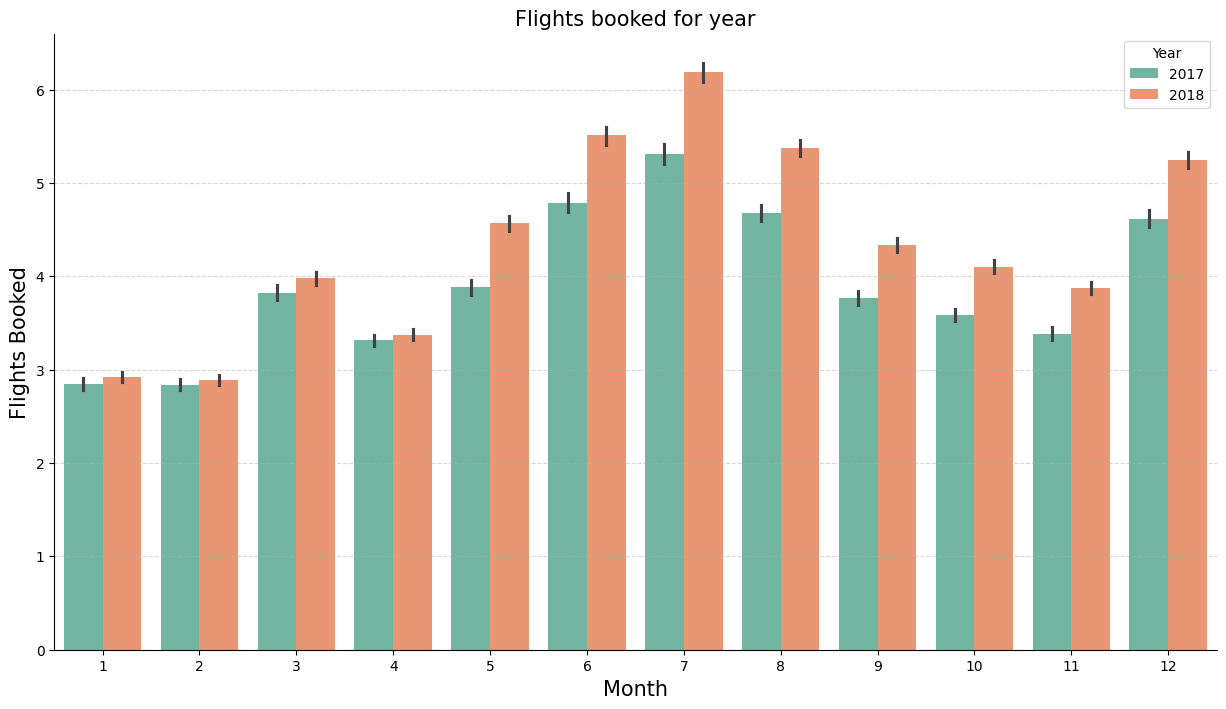

In [32]:

plt.figure(figsize=(15, 8)) #Establezco el tamaño de la figura 
# Gráfico de barras para hacer una comparación directa entre los años, meses y reservas
sns.barplot(x='Month', y='Flights_Booked', hue= 'Year', data=df_limpio, palette='Set2')
plt.title('Flights booked for year', fontsize=15)# Establezco el título del gráfico.
plt.xlabel('Month', fontsize=15) # Establezco las etiquetas del eje x  
plt.ylabel('Flights Booked', fontsize=15) # Establezco las etiquetas del eje y
plt.legend(title= 'Year') # Establezco la leyenda por años segun los colores
plt.grid(axis='y', linestyle='--', alpha=0.5)
# Ocultar los bordes derecho y superior
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.show()


----------------
- ***Análisis***: 
    - En el gáfico de arriba podemos observar que los meses donde más se reservan vuelos, tando en el año 2017 cómo el 2018, son en este orden julio, junio, agosto seguido del mes de diciembre. Podríamos que se tratan de meses vacacionales. 
    - Los meses con menos vuelos reservados son enero, febrero y abril, respectivamente.
-----------------

2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?


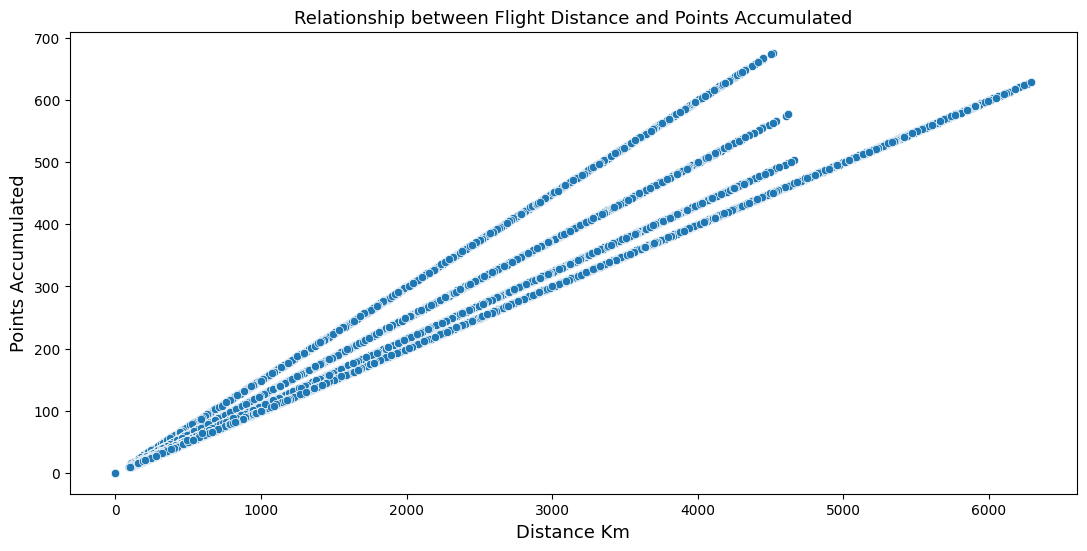

In [33]:
plt.figure(figsize=(13, 6)) #Establezco el tamaño de la figura 

# Crear el scatter plot que facilita la visualización entre patrones y tendencias de dos variables numéricas
sns.scatterplot(x='Distance', y='Points_Accumulated', data=df_limpio)

# Añadir títulos y etiquetas
plt.title('Relationship between Flight Distance and Points Accumulated', fontsize=13)
plt.xlabel('Distance Km', fontsize=13)
plt.ylabel('Points Accumulated', fontsize=13)
plt.show()

---------------
- ***Análisis***: 
    - El gráfico que vemos arriba nos muestra que existe una relación directa entre la distancia de los vuelos y los puntos acumulados por los clientes. Podemos afirmar que cuanto más largos son los vuelos, más puntos los clientes acumulan en su tarjeta de fidelidad.
---------------

3. ¿Cuál es la distribución de los clientes por provincia o estado?


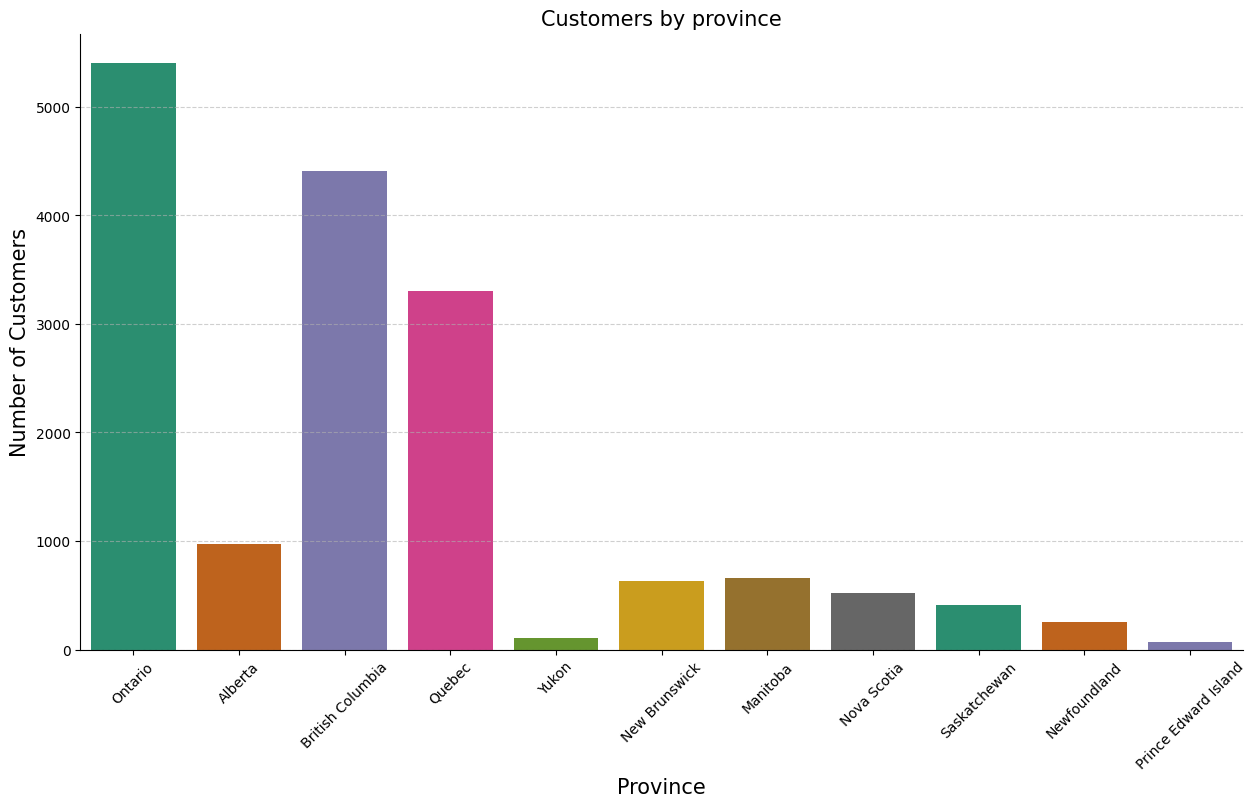

In [34]:
# Eliminar duplicados para contar cada cliente solo una vez por provincia
df_sin_duplis = df_limpio[['Loyalty_Number', 'Province']].drop_duplicates()

#Establezco el tamaño de la figura
plt.figure(figsize=(15, 8))

# Creo un count plot para visualizar el número de clientes por provincia
sns.countplot(x='Province', data=df_sin_duplis, hue='Province', palette='Dark2', dodge=False, legend=False)

# Añado títulos y etiquetas
plt.title('Customers by province', fontsize=15)
plt.xlabel('Province', fontsize=15)
plt.ylabel('Number of Customers', fontsize=15)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
# Oculto los bordes derecho y superior
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False);


In [35]:
df_sin_duplis = df_limpio.groupby('Province')['Loyalty_Number'].count().reset_index()
df_sin_duplis.rename(columns={'Loyalty_Number': 'Count'}, inplace=True)

# Ordenar por el conteo en orden descendente
df_sin_duplis_sorted = df_sin_duplis.sort_values(by='Count', ascending=False).reset_index(drop=True)

# Mostrar el DataFrame ordenado
print(df_sin_duplis_sorted)

                Province   Count
0                Ontario  130258
1       British Columbia  106442
2                 Quebec   79573
3                Alberta   23360
4               Manitoba   15900
5          New Brunswick   15352
6            Nova Scotia   12507
7           Saskatchewan    9861
8           Newfoundland    6244
9                  Yukon    2679
10  Prince Edward Island    1584


-------------
- ***Análisis***: 
    - La distribución de clientes por provincias respeta el siguinte orden: 
        - 1º. Ontario con 130.258 clientes.
        - 2º. British Columbia con 106.442 clientes.
        - 3º. Quebec con  79.573 clientes.
----------------

4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?


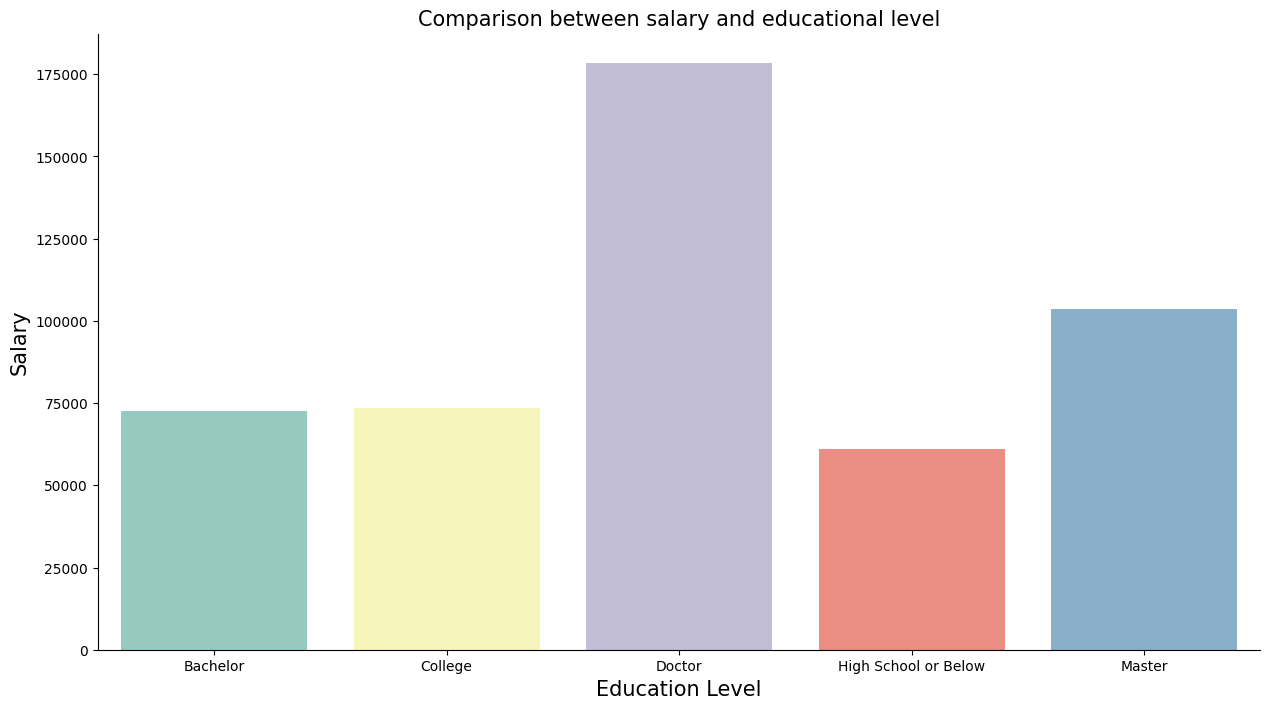

In [36]:

# Agrupo las dos variables para eliminar los duplicados y poder calcular correctamente los datos 
df_sin_duplis_2 = df_limpio.groupby('Education')['Salary'].mean().reset_index()
plt.figure(figsize=(15, 8)) #Establezco el tamaño de la figura 
# Gráfico de barras para hacer una comparación entre el salario medio y los niveles de educacion de los clientes
sns.barplot(x='Education',
            y='Salary', 
            data=df_sin_duplis_2, 
            palette='Set3')
plt.title('Comparison between salary and educational level', fontsize=15)# Establezco el título del gráfico.
plt.xlabel('Education Level', fontsize=15) # Establezco las etiquetas del eje x  
plt.ylabel('Salary', fontsize=15) # Establezco las etiquetas del eje y

# Ocultar los bordes derecho y superior
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False);

In [37]:
df_salary = df_limpio.groupby('Education')['Salary'].mean().reset_index()
print(f'El promedio de salarios por nivel educativo es:\n{np.round(df_salary, 2)}')

El promedio de salarios por nivel educativo es:
              Education     Salary
0              Bachelor   72599.08
1               College   73479.00
2                Doctor  178403.68
3  High School or Below   61146.38
4                Master  103734.52


-----------------
- ***Análisis***: 
    - Podemos observar que los salarios acompañan los niveles educativos, esto significa que cuanto más alto es el nivel educativo, más alto es el salario de los clientes. 
------------------

5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?


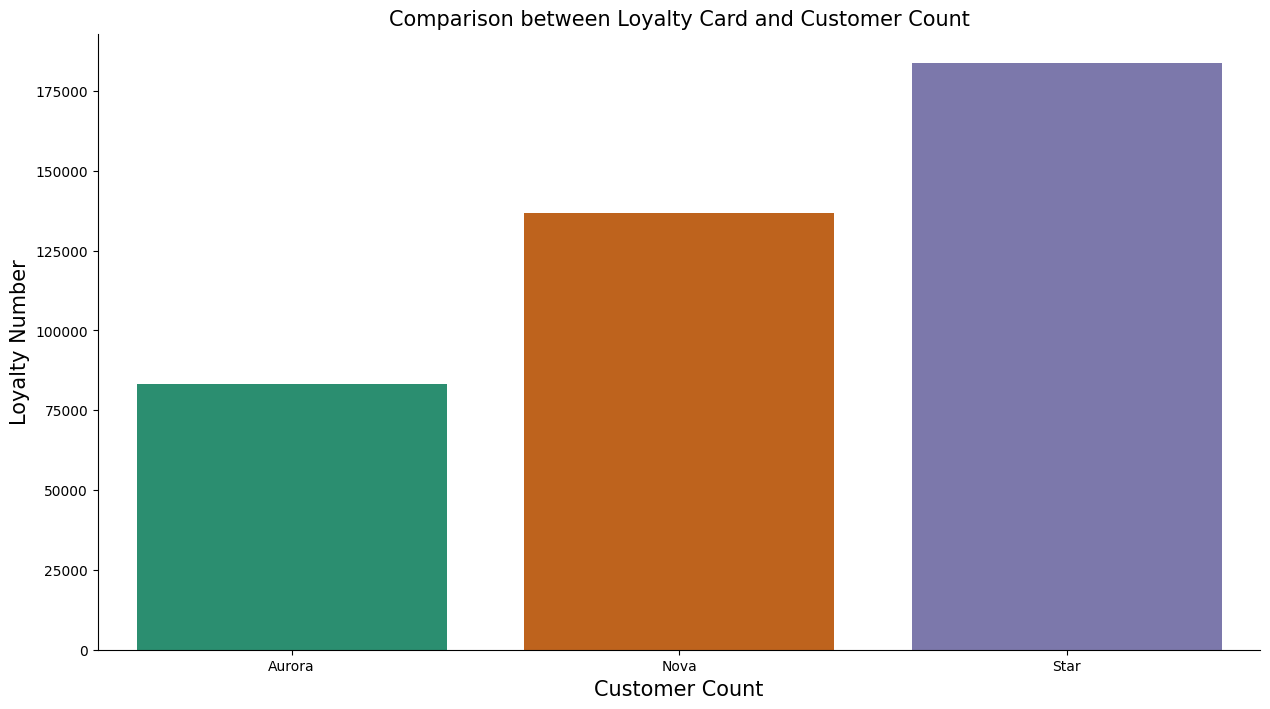

In [38]:
# Opto por agrupar para facilitar la visualizacion y evitar que se duplique los números
grouped_df = df_limpio.groupby('Loyalty_Card')['Loyalty_Number'].count().reset_index()
# Establezco el tamaño de la figura
plt.figure(figsize=(15, 8))
# Gráfico de barras para comparar Loyalty_Card y Loyalty_Number
sns.barplot(x='Loyalty_Card', y='Loyalty_Number', data=grouped_df, palette='Dark2')
plt.title('Comparison between Loyalty Card and Customer Count', fontsize=15)
plt.xlabel('Customer Count', fontsize=15)
plt.ylabel('Loyalty Number',fontsize=15)

# Ocultar los bordes derecho y superior
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False);


In [39]:
# Visualización de los números.
grouped_df = df_limpio.groupby('Loyalty_Card')['Loyalty_Number'].count().reset_index()
grouped_df

,Loyalty_Card,Loyalty_Number
0,Aurora,83132
1,Nova,136883
2,Star,183745


-----------------
- ***Análisis***:
    - Las tarjetas de fidelización se dividen en tres categorias y la que más número de clientes poseen es la Star con 183.745, seguida de Nova con 136.883 y Aurora con 83.132.
----------------

6. ¿Cómo se distribuyen los clientes según su estado civil y género?


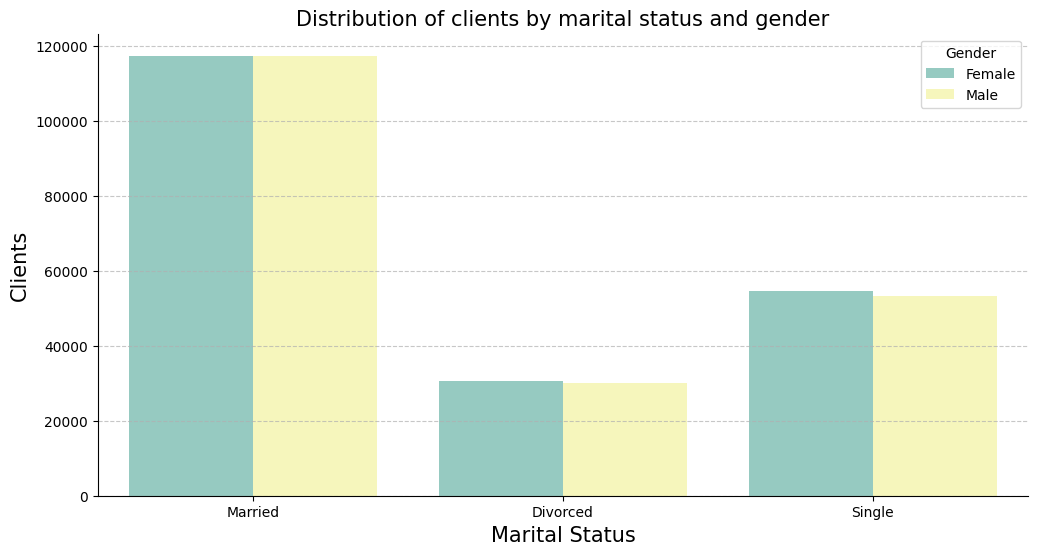

In [40]:

plt.figure(figsize=(12, 6))

# Utilizo un countplot ya que 
sns.countplot(x='Marital_Status', hue='Gender', data=df_limpio, palette='Set3', dodge=True)
plt.xlabel('Marital Status', fontsize=15)
plt.ylabel('Clients', fontsize=15)
plt.title('Distribution of clients by marital status and gender', fontsize=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Gender')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False);

In [41]:
# Visualización de los números.
grouped_clients_marital = df_limpio.groupby('Marital_Status')['Loyalty_Number'].count().reset_index()
grouped_clients_marital


,Marital_Status,Loyalty_Number
0,Divorced,60762
1,Married,234845
2,Single,108153


In [42]:
# Visualización de los números.
grouped_clients_gender = df_limpio.groupby('Gender')['Loyalty_Number'].count().reset_index()
grouped_clients_gender

,Gender,Loyalty_Number
0,Female,202757
1,Male,201003


-----------
- ***Análisis***: 
    - El gráfico de arriba nos muestra que existe una distribución equilibrada entre géneros y la mayoría de los clientes son casados, seguido de solteros y por último divorciados.
------------


## **Fase 3**: Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo

- Objetivo del Ejercicio: 
    - Utilizando un conjunto de datos que hemos compartido, se busca evaluar si existen diferencias significativas en el número de vuelos reservados según el nivel educativo de los clientes. Para ello, los pasos que deberas seguir son:
1. Preparación de Datos:
    - Filtra el conjunto de datos para incluir únicamente las columnas relevantes: 'Flights Booked' y 'Education'.


In [43]:
# Visualizo las dos variables que vamos a trabajar
education_booked= df_limpio.groupby('Education')['Flights_Booked'].count().reset_index()
education_booked

,Education,Flights_Booked
0,Bachelor,252567
1,College,102260
2,Doctor,17731
3,High School or Below,18915
4,Master,12287


2. Análisis Descriptivo:
    - Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas (como el promedio, la desviación estandar, los percentiles) del número de vuelos reservados para cada grupo.


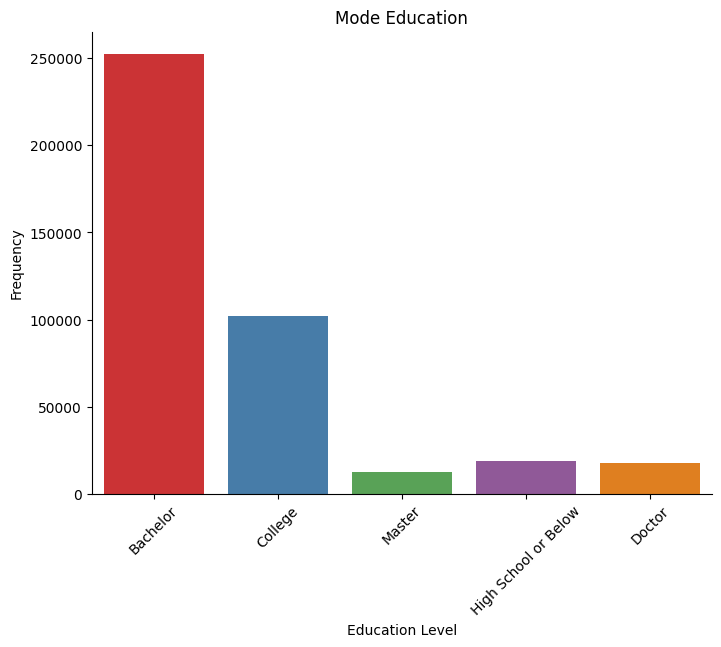

In [44]:

# Este gráfico de barras mostrará la frecuencia de cada nivel educativo y resaltará cuál es el más común (la moda).

# Establezco el tamaño de la gráfica
plt.figure(figsize=(8, 6))

# Uso el método `countplot()` para contar cuántos datos por categoría
sns.countplot(x='Education', 
              data=df_limpio, 
              palette='Set1')

plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.title('Mode Education')
plt.xticks(rotation=45); 
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False);

In [45]:

# Calculo la tabla de frecuencia absoluta
frecuencia_absoluta = df_limpio['Education'].value_counts()

# Calculo la tabla de frecuencia relativa incluyendo el parámetro "normalize" para que nos lo convierta en tanto por 1. 
frecuencia_relativa = df_limpio['Education'].value_counts(normalize=True) * 100

# creamos un DataFrame para mostrar ambas tablas
tabla_frecuencias = pd.DataFrame({
    'Nivel educativo': frecuencia_absoluta.index,
    'Frecuencia Absoluta': frecuencia_absoluta.values,
    'Frecuencia Relativa (%)': frecuencia_relativa.values
})
# vemos la tabla de frecuencias
print(tabla_frecuencias)


        Nivel educativo  Frecuencia Absoluta  Frecuencia Relativa (%)
0              Bachelor               252567                62.553745
1               College               102260                25.326927
2  High School or Below                18915                 4.684714
3                Doctor                17731                 4.391470
4                Master                12287                 3.043144


In [46]:
# Calculo la media, la media, la desviación estándar y la varianza de vuelos reservados por los clientes.
# La varianza de vuelos reservados  nos indica cuán dispersos están los vuelos reservados de los clientes alrededor de su valor promedio. 
# Si la varianza es alta, significa que los numeros de vuelos reservados varían mucho de un cliente a otro. 
# Si es baja, los numeros de vuelos reservados son más consistentes.

media_vuelos= df_limpio['Flights_Booked'].mean()
mediana_vuelos= df_limpio['Flights_Booked'].median()
desviacion_estandar_vuelos = df_limpio['Flights_Booked'].std()
varianza_vuelos = df_limpio['Flights_Booked'].var()
print(f"La media de vuelos reservados por los clientes es: {np.round(media_vuelos, 2)}")
print(f"La mediana de vuelos reservados por los clientes es: {np.round(mediana_vuelos, 2)}")
print(f"La desviación estándar de vuelos reservados por los clientes es: {np.round(desviacion_estandar_vuelos, 2)}")
print(f"La varianza  de vuelos reservados por los clientes es: {np.round(varianza_vuelos, 2)}")

La media de vuelos reservados por los clientes es: 4.13
La mediana de vuelos reservados por los clientes es: 1.0
La desviación estándar de vuelos reservados por los clientes es: 5.23
La varianza  de vuelos reservados por los clientes es: 27.35


----------
- ***Análisis***:
    - La varianza de 27.35 es relativamente alta en comparación con la media de 4.13. Esto nos puede indicar que hay una gran variabilidad en el número de vuelos reservados, con muchos clientes reservando pocos vuelos y algunos reservando muchos vuelos. 
    - La desviación estándar de 5.23 indica que, en promedio, los vuelos reservados por los clientes varían en 5.23 vuelos respecto a la media. 
    - Esto refuerza la idea de que hay una considerable dispersión en el número de vuelos reservados. Vemos que la distribución está sesgada a la derecha como muestra el boxplot abajo.
-------------

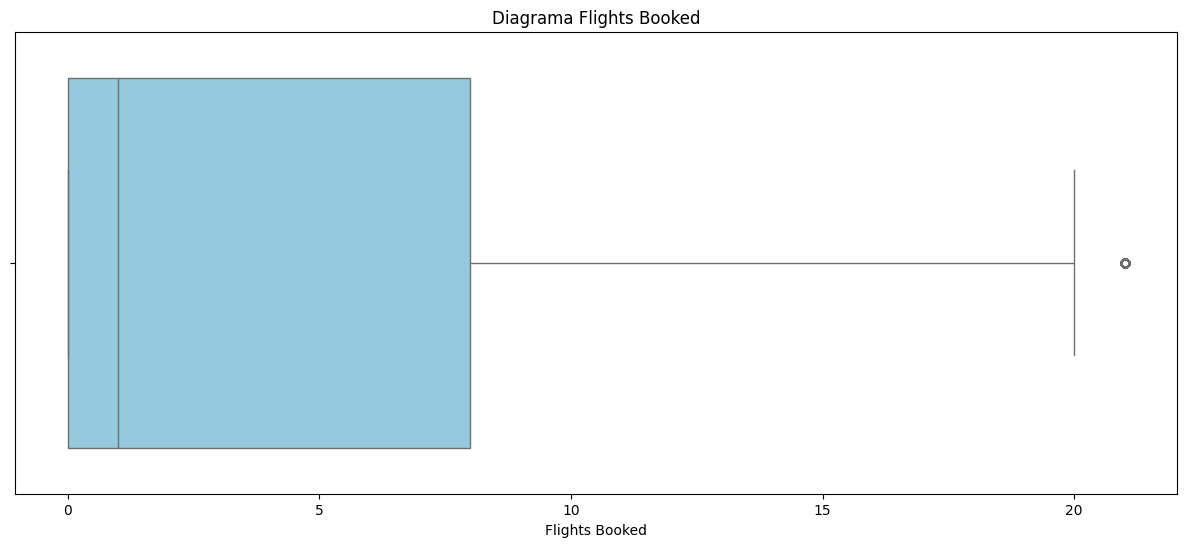

In [47]:
# Establezco el tamaño de la figura
plt.figure(figsize=(15, 6))

# utilizando el método boxplot visualizamos la mediana
sns.boxplot(x='Flights_Booked', 
            data=df_limpio, 
            color='skyblue')

# cambiamos el nombre del eje x
plt.xlabel('Flights Booked')

# ponems título a la gráfica
plt.title('Diagrama Flights Booked');

In [48]:
print(f"La descripción numérica de vuelos reservados por los clientes es:\n{np.round(df_limpio['Flights_Booked'].describe(), 2)}")

La descripción numérica de vuelos reservados por los clientes es:
count    403760.00
mean          4.13
std           5.23
min           0.00
25%           0.00
50%           1.00
75%           8.00
max          21.00
Name: Flights_Booked, dtype: float64


---------------
- Descripción de los datos: 
1. **Número de Observaciones (count):** 403.760

2. **Media (mean):** 4.13
   - La media indica que, en promedio, cada cliente reserva aproximadamente 4.13 vuelos.

3. **Desviación Estándar (std):** 5.23
   - La desviación estándar es una medida de dispersión que indica cuánto varían los datos respecto a la media. En este caso, la desviación estándar es 5.23, lo que indica que los datos tienen una dispersión considerable alrededor de la media de 4.13.

4. **Valores Mínimo (min) y Máximo (max):**
   - El valor mínimo es 0, lo que significa que algunos clientes no reservaron ningún vuelo.
   - El valor máximo es 21, que representa el número máximo de vuelos reservados por un cliente.

5. **Percentiles:**
   - **25% (primer cuartil):** 0.0
   - **50% (mediana):** 1.0
   - **75% (tercer cuartil):** 8.0
   - El 25% de los clientes no reservaron ningún vuelo (primer cuartil), el 50% reservó 1 vuelo o menos (mediana), y el 75% reservó 8 vuelos o menos (tercer cuartil).

- Interpretación:

- **Media y Mediana:** La media (4.13) es mayor que la mediana (1.0). Esto muestra que la distribución de la cantidad de vuelos reservados está sesgada hacia la derecha. Hay algunos clientes que reservan muchos vuelos, lo que incrementa la media.

- **Desviación Estándar:** La desviación estándar de 5.23 indica que los datos están bastante dispersos alrededor de la media. Esto sugiere una variabilidad significativa en la cantidad de vuelos reservados por los clientes.

- **Valor Mínimo y Máximo:** El rango de los datos va desde 0 hasta 21 vuelos. Esto muestra la variabilidad en el comportamiento de reserva de los clientes, con algunos clientes no reservando ningún vuelo y otros reservando hasta 21 vuelos.
-------------


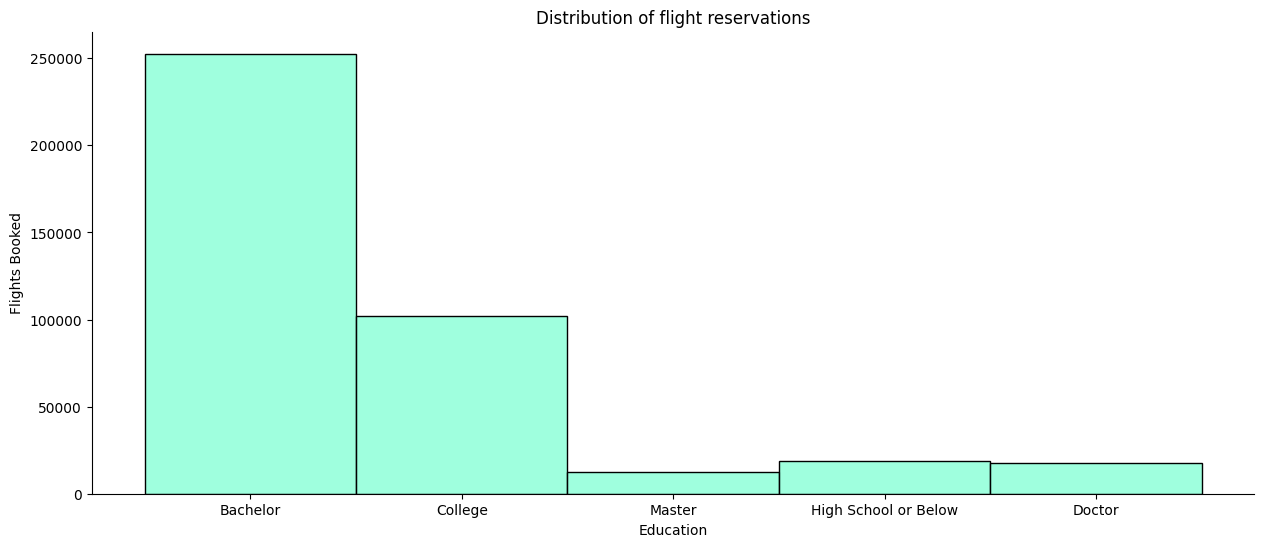

In [49]:
# Establezco el tamaño de la figura
plt.figure(figsize=(15,6))

# Utilizo un histplot para visualizar la mediana
sns.histplot(data=df_limpio, 
             x='Education', 
             color= 'aquamarine')

plt.xlabel('Education')
plt.ylabel('Flights Booked')
plt.title('Distribution of flight reservations'); 
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False);

3. Prueba Estadística:
    - Realiza una prueba de hipótesis para determinar si existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.



In [50]:
agrupado_describe = df_limpio.groupby('Education')['Flights_Booked'].describe().T
agrupado_describe

Education,Bachelor,College,Doctor,High School or Below,Master
count,252567.000000,102260.000000,17731.000000,18915.000000,12287.000000
mean,4.110288,4.169744,4.175512,4.176209,4.200700
std,5.221671,5.246040,5.256971,5.239267,5.213956
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000
75%,8.000000,8.000000,8.000000,8.000000,8.000000
max,21.000000,21.000000,21.000000,21.000000,21.000000


In [51]:

# Filtramos las columnas relevantes
df_filtrado = df_limpio[['Flights_Booked', 'Education']]

# Agrupo los datos por nivel educativo y calcular estadísticas descriptivas
agrupado = df_filtrado.groupby('Education')['Flights_Booked'].describe()

# Mostrar las estadísticas descriptivas
print(agrupado)

# Agrupo los datos por nivel educativo para ANOVA
df_agrupado = [group['Flights_Booked'].values for name, group in df_filtrado.groupby('Education')]

# Aplico ANOVA
resultado_anova = stats.f_oneway(*df_agrupado)

# Mostrar el resultado de ANOVA
print('ANOVA result:', resultado_anova)


                         count      mean       std  min  25%  50%  75%   max
Education                                                                   
Bachelor              252567.0  4.110288  5.221671  0.0  0.0  1.0  8.0  21.0
College               102260.0  4.169744  5.246040  0.0  0.0  1.0  8.0  21.0
Doctor                 17731.0  4.175512  5.256971  0.0  0.0  1.0  8.0  21.0
High School or Below   18915.0  4.176209  5.239267  0.0  0.0  1.0  8.0  21.0
Master                 12287.0  4.200700  5.213956  0.0  0.0  1.0  8.0  21.0
ANOVA result: F_onewayResult(statistic=3.578957738498352, pvalue=0.00635298173601954)


In [52]:
# Filtramos las columnas relevantes
df_filtered = df_limpio[['Flights_Booked', 'Education']]

# Agrupar por nivel educativo y calcular estadísticas descriptivas
grouped_stats = df_filtered.groupby('Education')['Flights_Booked'].describe()
print('Estadísticas descriptivas por nivel educativo:')
print(grouped_stats)

# Valor del estadístico F y valor p del ANOVA (hipotético)
F_statistic = 3.578957738498352
p_value = 0.00635298173601954

# Mostrar las medias calculadas por grupo
print("\nMedias calculadas por grupo:")
group_means = df_filtered.groupby('Education')['Flights_Booked'].mean()
for group, mean in group_means.items():
    print(f"{group}: {mean}")

# Expresar las hipótesis H0 y H1
print("\nHipótesis:")
print("H0: Las medias de los grupos son iguales (mu1 = mu2 = ... = mun)")
print("H1: Al menos una de las medias de los grupos es diferente")

# Mostrar el resultado del ANOVA
print("\nResultado del ANOVA:")
print(f"Estadístico F: {F_statistic}")
print(f"Valor p: {p_value}")

# Interpretación del resultado basada en el valor p
alpha = 0.05
if p_value < alpha:
    print("\nConclusión: Se rechaza H0. Hay evidencia suficiente para concluir que al menos una de las medias es diferente.")
else:
    print("\nConclusión: No se rechaza H0. No hay suficiente evidencia para concluir que alguna de las medias es diferente.")


Estadísticas descriptivas por nivel educativo:
                         count      mean       std  min  25%  50%  75%   max
Education                                                                   
Bachelor              252567.0  4.110288  5.221671  0.0  0.0  1.0  8.0  21.0
College               102260.0  4.169744  5.246040  0.0  0.0  1.0  8.0  21.0
Doctor                 17731.0  4.175512  5.256971  0.0  0.0  1.0  8.0  21.0
High School or Below   18915.0  4.176209  5.239267  0.0  0.0  1.0  8.0  21.0
Master                 12287.0  4.200700  5.213956  0.0  0.0  1.0  8.0  21.0

Medias calculadas por grupo:
Bachelor: 4.11028756725938
College: 4.169743790338353
Doctor: 4.175511815464441
High School or Below: 4.176209357652657
Master: 4.200699926751851

Hipótesis:
H0: Las medias de los grupos son iguales (mu1 = mu2 = ... = mun)
H1: Al menos una de las medias de los grupos es diferente

Resultado del ANOVA:
Estadístico F: 3.578957738498352
Valor p: 0.00635298173601954

Conclusión: Se rec

--------------
- ***Anásilis***
    - Con la prueba del ANOVA podemos observar que la desviación estándar indica una alta variabilidad en el número de vuelos reservados.
    - En el apartado de los percentiles vemos que:
        - El 25% de los clientes reservó 0 vuelos.
        - El 50% de los clientes reservó 1 vuelo, dato que representa la mediana.
        - El 75% de los clientes reservó 8 vuelos.
    - El Valor_p es menor que el nivel de significancia 0.05 lo que nos indica que es poco probable que las medias sean iguales entre si. 
---------------

In [53]:
# Hago una prueba de normalidad para comprobar si la distribución es normal 
stat, p_value = shapiro(df_limpio['Flights_Booked'])

print(f"Estadístico de Shapiro-Wilk: {stat}")
print(f"Valor p: {p_value}")

if p_value > 0.05:
    print("No se rechaza la hipótesis nula. Los datos parecen seguir una distribución normal.")
else:
    print("Se rechaza la hipótesis nula. Los datos no siguen una distribución normal.")


Estadístico de Shapiro-Wilk: 0.7888268872793208
Valor p: 1.5469185712625607e-164
Se rechaza la hipótesis nula. Los datos no siguen una distribución normal.


------------
- Se hace una prueba para comprobar la normalidad de los datos, utilizando el metodo Shapiro-Wilk. La H0 es de que los datos siguen una distribución normal. El estadítico de Shapiro-Wilk nos indica que cuanto más cercano a 1, mas probable que provengan de una distribución normal.
- En este caso la prueba nos ha indicado que la distribución no es normal, por eso aplicaremos el test de hipotesis Kruskal-Wallis.
------------ 

In [54]:
# Filtro las columnas relevantes
df_filtered = df_limpio[['Flights_Booked', 'Education']]

# Agrupo por nivel educativo y calcular estadísticas descriptivas
grouped_stats = df_filtered.groupby('Education')['Flights_Booked'].describe()
print('Estadísticas descriptivas por nivel educativo:')
print(grouped_stats)

# Extraer los datos de cada grupo
groups = [group['Flights_Booked'].values for name, group in df_filtered.groupby('Education')]

# Prueba de Kruskal-Wallis
stat, p = kruskal(*groups)

# Printeo el resultado
print('Estadístico de Kruskal-Wallis:', stat)
print('p-valor:', p)

# Interpretación del p-valor
alpha = 0.05
if p < alpha:
    print("Rechazamos H0: Hay diferencias significativas en el número de vuelos reservados entre los diferentes niveles educativos.")
else:
    print("No podemos rechazar H0: No hay diferencias significativas en el número de vuelos reservados entre los diferentes niveles educativos.")



Estadísticas descriptivas por nivel educativo:
                         count      mean       std  min  25%  50%  75%   max
Education                                                                   
Bachelor              252567.0  4.110288  5.221671  0.0  0.0  1.0  8.0  21.0
College               102260.0  4.169744  5.246040  0.0  0.0  1.0  8.0  21.0
Doctor                 17731.0  4.175512  5.256971  0.0  0.0  1.0  8.0  21.0
High School or Below   18915.0  4.176209  5.239267  0.0  0.0  1.0  8.0  21.0
Master                 12287.0  4.200700  5.213956  0.0  0.0  1.0  8.0  21.0
Estadístico de Kruskal-Wallis: 17.532618623121756
p-valor: 0.0015225470219889367
Rechazamos H0: Hay diferencias significativas en el número de vuelos reservados entre los diferentes niveles educativos.


________
- ***Análisis***
    - Devido a la distribución no normal de los datos, hemos utilizado la prueba de hipótesis Kruskal-Wallis que se basa en la mediana de los valores.
    - Con los datos obtenidos podemos comprobar que el p-valor es menor que el nivel de significancia (0.0015 < 0.05), por lo cual rechazamos la hipótesis nula (H0) que afirma que no hay diferencias significativas entre el numero de vuelos reservados por nivel educativo.
    - Con esto podemos compreender que el nivel educativo tiene un efecto significativo en el número de vuelos reservados.
    - Esta prueba también rechaza la H0 que afirma que no hay diferencias significativas entre reservas y nivel escolar.
    - Las razones por la cuales esto pasa se podria estudiar con mayor profundidad si analisamos e incluimos otras variables como ingresos por ejemplo. 
------------

In [55]:

# Prueba de Dunn con corrección de Bonferroni (análisis post-hoc). Calcula la diferencia entre los rangos promedio de cada par de grupos.
dunn_test = sp.posthoc_dunn(df_filtered, val_col='Flights_Booked', group_col='Education', p_adjust='bonferroni')

print('Resultados del test de Dunn:')
print(dunn_test)

Resultados del test de Dunn:
                      Bachelor   College    Doctor  High School or Below  \
Bachelor              1.000000  0.022735  0.949079              0.362961   
College               0.022735  1.000000  1.000000              1.000000   
Doctor                0.949079  1.000000  1.000000              1.000000   
High School or Below  0.362961  1.000000  1.000000              1.000000   
Master                0.142438  1.000000  1.000000              1.000000   

                        Master  
Bachelor              0.142438  
College               1.000000  
Doctor                1.000000  
High School or Below  1.000000  
Master                1.000000  


----------
- ***Análisis***
    - Tras investigar otros tipos de pruebas, hemos utilizado la prueba Dunn con corrección de Bonferroni que se realiza después de una prueba de hipótesis como ANOVA o Kruskal Wallis para comprobar combinaciones entre los diferentes grupos y ver las diferencias significativas entre los mismos, ajustando el P Value para cada grupo comparado
    - El resultado nos muestra que la mayor diferencia significativa se encuentra entre los grupos Bachelor y College, los demás grupos no tienen diferencias significativas.
    - Igualmente todo el análisis corrobora la hipótesis de que hay diferencias significativas entre los grupos educativos.

______________